# Multi-Ouput Neural Networks

There is a lot of IL data available in the literature, some property data more than others.

There's groing evidence that multi-output networks can outperform their single-output constituents

In [7]:
import salty
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
model = MLPRegressor(activation='relu', alpha=0.92078, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=75, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1e8, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-08, validation_fraction=0.1,
       verbose=False, warm_start=False)
multi_model = MultiOutputRegressor(model)

In [2]:
imputeData = salty.aggregate_data(['cpt', 'density'], merge='union',
                                  impute=True)
interData = salty.aggregate_data(['cpt', 'density'])
unionData = salty.aggregate_data(['cpt', 'density'], merge='union')

In [32]:
X_train, Y_train, X_test, Y_test = salty.devmodel_to_array(imputeData)

In [33]:
multi_model.fit(X_train, Y_train)

MultiOutputRegressor(estimator=MLPRegressor(activation='relu', alpha=0.92078, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=75, learning_rate='constant',
       learning_rate_init=0.001, max_iter=100000000.0, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-08, validation_fraction=0.1,
       verbose=False, warm_start=False),
           n_jobs=1)

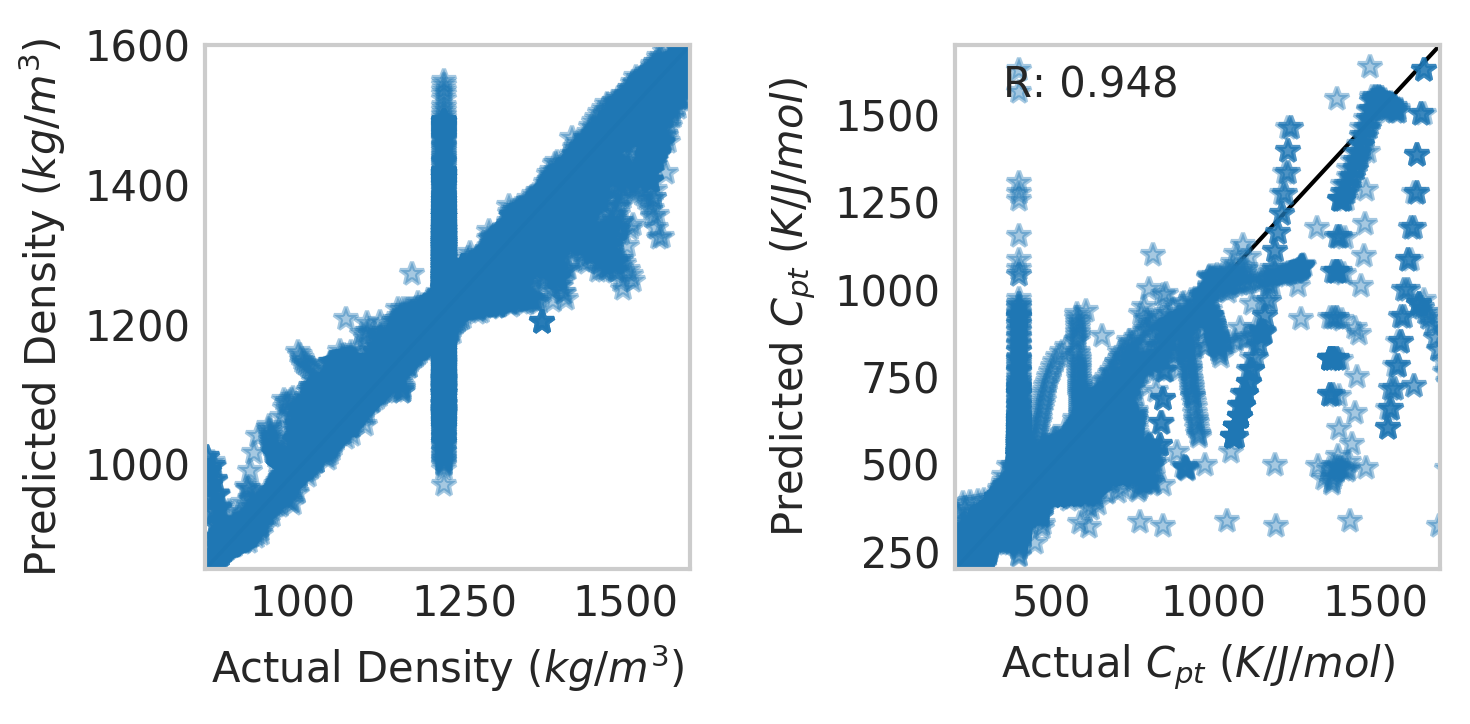

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
X=X_train
Y=Y_train
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(5,2.5), dpi=300)
    ax=fig.add_subplot(122)
    ax.plot([0,2000], [0,2000], linestyle="-", label=None, c="black", linewidth=1)
    ax.plot(np.exp(Y)[:,0],np.exp(multi_model.predict(X))[:,0],\
            marker="*",linestyle="",alpha=0.4)
    ax.set_ylabel("Predicted $C_{pt}$ $(K/J/mol)$")
    ax.set_xlabel("Actual $C_{pt}$ $(K/J/mol)$")
    ax.text(0.1,.9,"R: {0:5.3f}".format(multi_model.score(X,Y)), transform = ax.transAxes)
    plt.xlim(200,1700)
    plt.ylim(200,1700)
    ax.grid()
    ax=fig.add_subplot(121)
    ax.plot([0,2000], [0,2000], linestyle="-", label=None, c="black", linewidth=1)
    ax.plot(np.exp(Y)[:,1],np.exp(multi_model.predict(X))[:,1],\
            marker="*",linestyle="",alpha=0.4)
    
    ax.set_ylabel("Predicted Density $(kg/m^3)$")
    ax.set_xlabel("Actual Density $(kg/m^3)$")
    plt.xlim(850,1600)
    plt.ylim(850,1600)
    ax.grid()
    plt.tight_layout()

In [10]:
property_models = [imputeData, interData, unionData]
model_scores = []
for i, name in enumerate(property_models):
    X_train, Y_train, X_test, Y_test = salty.devmodel_to_array(name)
    model_scores.append(cross_val_score(multi_model, X_train,
                                        Y_train, cv=5))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-015846b38b29>", line 6, in <module>
    Y_train, cv=5))
  File "/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 140, in cross_val_score
    for train, test in cv_iter)
  File "/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 758, in __call__
    while self.dispatch_one_batch(iterator):
  File "/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 608, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/wesleybeckner/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py", line 571, in _dispatch
    job = self._backend.

KeyboardInterrupt: 